# MNIST with machine learning

In this exercise we will give MNIST digits another try, but this time we will apply what we've learnt about machine learning algorithms. The idea is to correctly estimate the best parameter(s) for an algorithm in order to get the highest accuracy. At the end of this exercise you will upload your results to [this Kaggle contest](https://www.kaggle.com/c/digit-recognizer).

## Loading the dataset

Here we will load the Kaggle training set and test set. The training is a CSV with 42000 rows and 785 columns (28x28 pixels + 1 label), while the test set has 28000 rows and 784 columns. The test set in this exercise is used only for submission to Kaggle, which means you will have to do cross-validation on only the training set.

In [2]:
import pandas as pd

data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

We visualize training data and its types.

In [3]:
print(data.dtypes)
data.head()

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the first column here is the label that indicates the digit of the corresponding pixels. We will change its type to be categorical. 

In [4]:
data.label = data.label.astype("category")
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

We can see that the different labels are somewhat evenly distributed. We can also describe a column to see the different values a pixel can take.

In [5]:
data.pixel774.describe()

count    42000.000000
mean         0.219286
std          6.312890
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        254.000000
Name: pixel774, dtype: float64

## Workshop: Fitting KNN

Integrantes (3 max):
- Nicolas Biojo 
- David erazo

We will now fit a KNN model to the data, first we split the data to perform stratified cross validation. We have to stratify since the probabilities of each label are slightly different.

### Splitting the data

We will split the data using 20% of it as a **validation** set.

In [6]:
from sklearn.model_selection import train_test_split

data_train_pred, data_test_pred, data_train_label, data_test_label = train_test_split(data.drop("label", axis = 1), data.loc[:,["label"]], test_size = 0.2)

In [7]:
print(f"Train X: {(len(data_train_pred))}")
print(f"Train Y: {(len(data_train_label))}")
print(f"Test X: {(len(data_test_pred))}")
print(f"Test Y: {(len(data_test_label))}")

Train X: 33600
Train Y: 33600
Test X: 8400
Test Y: 8400


### Finding the K

Now we will find the K by trying powers of 10 followed by different K's 1000 at a time until an arbitrarilly chosen 30000 neighbors max.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
ks = list (range(1,10))
k_error = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=(k)).fit(data_train_pred, data_train_label.values.ravel())
    score = model.score(data_test_pred, data_test_label.values.ravel())
    k_error.append(1 - score)
    
    print("{} Error: {}".format(k,1 - score))

error_data = pd.DataFrame({
    
    "k": ks,
    "error": k_error
})

1 Error: 0.03130952380952379
2 Error: 0.03642857142857148
3 Error: 0.030952380952380953
4 Error: 0.030714285714285694
5 Error: 0.030000000000000027
6 Error: 0.03273809523809523
7 Error: 0.0334523809523809
8 Error: 0.03369047619047616
9 Error: 0.03452380952380951


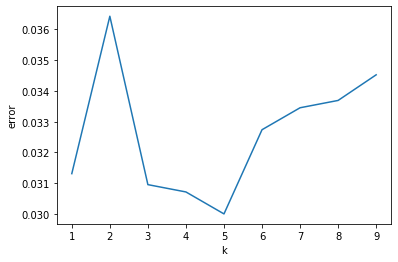

In [10]:
import seaborn as sns

_ = sns.lineplot(x = "k", y = "error", data = error_data)

Now we will visualize the error result.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
ks = list (range(10,1000,10))
k_error = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=(k)).fit(data_train_pred, data_train_label.values.ravel())
    score = model.score(data_test_pred, data_test_label.values.ravel())
    k_error.append(1 - score)
    
    print("{} Error: {}".format(k,1 - score))

error_data = pd.DataFrame({
    
    "k": ks,
    "error": k_error
})

10 Error: 0.035595238095238124
20 Error: 0.04261904761904767
30 Error: 0.04714285714285715
40 Error: 0.05202380952380947
50 Error: 0.055714285714285716
60 Error: 0.058809523809523756
70 Error: 0.06000000000000005
80 Error: 0.06297619047619052
90 Error: 0.06547619047619047
100 Error: 0.0675
110 Error: 0.0714285714285714
120 Error: 0.07238095238095243
130 Error: 0.07404761904761903
140 Error: 0.0770238095238095
150 Error: 0.07916666666666672
160 Error: 0.08011904761904765
170 Error: 0.08261904761904759
180 Error: 0.08238095238095233
190 Error: 0.08404761904761904
200 Error: 0.08464285714285713
210 Error: 0.08690476190476193
220 Error: 0.08892857142857147
230 Error: 0.09011904761904765
240 Error: 0.09190476190476193
250 Error: 0.09297619047619043
260 Error: 0.09404761904761905
270 Error: 0.09559523809523807
280 Error: 0.096547619047619
290 Error: 0.09833333333333338
300 Error: 0.09952380952380957
310 Error: 0.09916666666666663
320 Error: 0.10119047619047616
330 Error: 0.10166666666666668


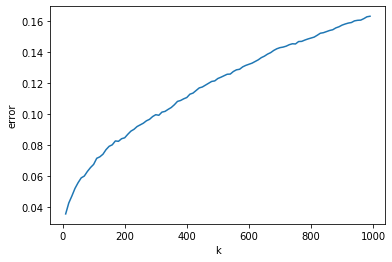

In [12]:
import seaborn as sns

_ = sns.lineplot(x = "k", y = "error", data = error_data)